In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep
from mplhep import *
linestyle_str = [
('solid', 'solid'), # Same as (0, ()) or '-'
('dotted', '.'),# Same as (0, (1, 1)) or '.'
('dashed', '--'),   # Same as '--'
('dashdot', '-.')]  # Same as '-.'
from matplotlib.pyplot import *
import matplotlib as mpl
plt.rc('text', usetex=True)
plt.rc('font', family='Times New Roman')
from  matplotlib import *
mpl.rcParams['figure.figsize'] = (10,6)
import sympy as sy
#sy.init_printing()
from sympy import *
from numpy import sqrt, pi
%matplotlib inline

In [2]:
gchi, MZp, gqV, gqL, gqR, Me, MMU, MTA, MU, MC, MT, MD, MS, MB, Mchi, Mq, X, gqA, gqV, cw = sy.symbols('gchi MZp gqV gqL gqR ME MMU Mta Mu Mc Mt Md MS Mb Mchi Mq X gqA gqV cw', real=True)
gZp = 1 
gsd = -2*gchi
#xev = MZp/(2*gchi)

In [3]:
def Zpuu(MZp, gqA, gqV):
    gqL = gqV + gqA
    gqR = gqV - gqA
    Zpuu =  simplify(simplify( (gZp**2*(gqA**2*(1 - (4*MU**2)/MZp**2) + gqV**2*(1 + (2*MU**2)/MZp**2))*sy.sqrt((1 - (4*MU**2)/MZp**2)*MZp**4))/(16*sy.sqrt(MZp**2)*sy.pi)
                              ).subs(MU**2, X *MZp**2)).subs(X, MU**2 /MZp**2)
    return Zpuu 
            
def Zpcc(MZp, gqA, gqV):
    gqL = gqV + gqA
    gqR = gqV - gqA    
    Zpcc = simplify(simplify((gZp**2*(gqA**2*(1 - (4*MC**2)/MZp**2) + gqV**2*(1 + (2*MC**2)/MZp**2))*sy.sqrt((1 - (4*MC**2)/MZp**2)*MZp**4))/(16*sy.sqrt(MZp**2)*sy.pi) 
                             ).subs(MC**2, X *MZp**2)).subs(X, MC**2 /MZp**2)
    return Zpcc

def Zptt(MZp, gqA, gqV):
    gqL = gqV + gqA
    gqR = gqV - gqA    
    Zptt = simplify(simplify( (gZp**2*(gqA**2*(1 - (4*MT**2)/MZp**2) + gqV**2*(1 + (2*MT**2)/MZp**2))*sy.sqrt((1 - (4*MT**2)/MZp**2)*MZp**4))/(16*sy.sqrt(MZp**2)*sy.pi)).subs(MT**2, X *MZp**2)).subs(X, MT**2 /MZp**2)
    return Zptt

def Zpdd(MZp, gqA, gqV):
    gqL = gqV + gqA
    gqR = gqV - gqA    
    Zpdd = simplify(simplify( ((-48*gqA**2*MD**2 + 48*gqA*gqL*gZp*MD**2 - 48*gqA*gqR*gZp*MD**2 - 6*gqL**2*gZp**2*MD**2 + 36*gqL*gqR*gZp**2*MD**2 - 6*gqR**2*gZp**2*MD**2 + 12*gqA**2*MZp**2 - 12*gqA*gqL*gZp*MZp**2 + 12*gqA*gqR*gZp*MZp**2 + 6*gqL**2*gZp**2*MZp**2 + 6*gqR**2*gZp**2*MZp**2)*sy.sqrt(-4*MD**2*MZp**2 + MZp**4))/(48*sy.pi*(MZp)**3)
                        ).subs(MD**2, X *MZp**2)).subs(X, MD**2 /MZp**2)
    return Zpdd

def Zpss(MZp, gqA, gqV):
    gqL = gqV + gqA
    gqR = gqV - gqA    
    Zpss = simplify(simplify( ((-48*gqA**2*MS**2 + 48*gqA*gqL*gZp*MS**2 - 48*gqA*gqR*gZp*MS**2 - 6*gqL**2*gZp**2*MS**2 + 36*gqL*gqR*gZp**2*MS**2 - 6*gqR**2*gZp**2*MS**2 + 12*gqA**2*MZp**2 - 12*gqA*gqL*gZp*MZp**2 + 12*gqA*gqR*gZp*MZp**2 + 6*gqL**2*gZp**2*MZp**2 + 6*gqR**2*gZp**2*MZp**2)*sy.sqrt(-4*MS**2*MZp**2 + MZp**4))/(48*sy.pi*(MZp)**3)
                        ).subs(MS**2, X *MZp**2)).subs(X, MS**2 /MZp**2)
    return Zpss

def Zpbb(MZp, gqA, gqV):
    gqL = gqV + gqA
    gqR = gqV - gqA    
    Zpbb = simplify(simplify( ((-48*gqA**2*MB**2 + 48*gqA*gqL*gZp*MB**2 - 48*gqA*gqR*gZp*MB**2 - 6*gqL**2*gZp**2*MB**2 + 36*gqL*gqR*gZp**2*MB**2 - 6*gqR**2*gZp**2*MB**2 + 12*gqA**2*MZp**2 - 12*gqA*gqL*gZp*MZp**2 + 12*gqA*gqR*gZp*MZp**2 + 6*gqL**2*gZp**2*MZp**2 + 6*gqR**2*gZp**2*MZp**2)*sy.sqrt(-4*MB**2*MZp**2 + MZp**4))/(48*sy.pi*(MZp)**3)
                        ).subs(MB**2, X *MZp**2)).subs(X, MB**2 /MZp**2)
    return Zpbb

def ZpXX(MZp, gchi, Mchi):
    ZpXX = simplify(simplify(((-16*gchi**2*Mchi**2 + 4*gchi**2*MZp**2)*sy.sqrt(-4*Mchi**2*MZp**2 + MZp**4))/(96*sy.pi*(MZp)**3)
                        ).subs(Mchi**2, X *MZp**2)).subs(X, Mchi**2 /MZp**2)
    return ZpXX

def Zpqq(MZp, gqA, gqV):
    Zpqq =  simplify(Zpuu(MZp, gqA, gqV) + Zpcc(MZp,gqA, gqV) + Zptt(MZp, gqA, gqV) + Zpdd(MZp,gqA, gqV) + Zpss(MZp, gqA, gqV)+ Zpbb(MZp,gqA, gqV))
    return Zpqq

def Zpallall(MZp, gqA, gqV, Mchi):
    Zpallall =  simplify(Zpqq(MZp, gqA, gqV) + ZpXX(MZp, gchi, Mchi))
    return Zpallall

# BRs
def BR_Zp_qq(MZp, gchi, gqA, gqV,Mchi): 
    return simplify(Zpqq(MZp, gqA, gqV) / (Zpallall(MZp, gqA, gqV, Mchi)))

def BR_Zp_XX(MZp, gchi, gqA, gqV,Mchi):
    return simplify(ZpXX(MZp, gchi, Mchi) / (Zpallall(MZp, gqA, gqV, Mchi)))

In [9]:
ZpXX(MZp, gchi, Mchi)

MZp*gchi**2*(1 - 4*Mchi**2/MZp**2)**(3/2)/(24*pi)

In [10]:
#gqA =0

In [11]:
Zpuu(MZp, gqA, gqV)


MZp*gqV**2*sqrt(1 - 4*Mu**2/MZp**2)*(1 + 2*Mu**2/MZp**2)/(4*pi)

In [5]:
MU = 0.00255
MC = 1.27
MT = 172
MD = 0.00504
MS = 0.101
MB = 4.7

In [14]:
Mchi= 200
gchi = 0.5

gqV= 0.5 
gqA = 0
MZp = 3000
print(BR_Zp_XX(MZp, gchi, gqA, gqV,Mchi).evalf())


0.0263286881253851


In [15]:
0.1487*0.0263286881253851



0.0039150759242447646

In [12]:
Mchi = 50
MZp = 1500
gqA = 0.1
gqV = 0.5
gchi = 1.0
print(BR_Zp_qq(MZp, gchi, gqA, gqV,Mchi).evalf())


0.900583973735068


In [13]:
8.619*0.900583973735068



7.762133269622551

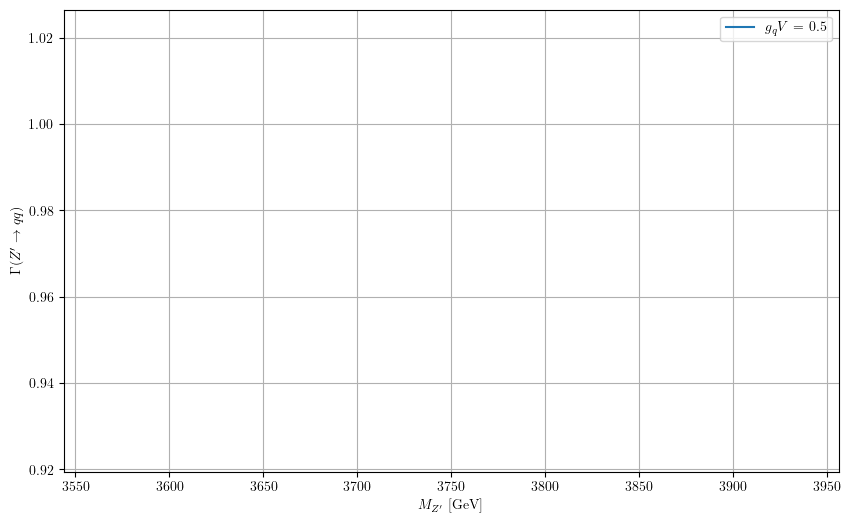

In [8]:
MZp_values = [3750] #list(range(500, 4000, 500))
Mchi = 50
gqV_values = [0.5]
plt.figure(figsize=(10,6))
for gqV in gqV_values:
    Gamma_values = [BR_Zp_qq(MZp, gchi, gqA, gqV,Mchi)  for MZp in MZp_values]
    plt.plot(MZp_values, Gamma_values, label=f'$g_qV$ = {gqV}')
    
plt.xlabel(r'$M_{Z^{\prime}}$ [GeV]')
plt.ylabel(r'$\Gamma(Z^{\prime} \to q q )$')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
#MZp_values = list(range(500, 4000, 500))
#MH2_values = list(range(250, 4000, 500))
#Mchi_values = 140
#gchi_values = 1
#gq_values = [0.005,0.05, 0.1]
#Sa_values = [0.005,0.05, 0.1, 0.5]
ychi = 1
MU = 0.00255
MC = 1.27
MT = 172
MD = 0.00504
MS = 0.101
MB = 4.7
plt.figure(figsize=(10,6))
for gq in gq_values:
    BR_values = [BR_Zp_XX(MZp, gchi_values, gq, Mchi_values) for MZp in MZp_values]
    plt.plot(MZp_values, BR_values, label=f'$g_q$ = {gq}')
plt.xlabel(r'$M_{Z^{\prime}}$ [GeV]')
plt.ylabel(r'BR($Z^{\prime} \to \chi \chi)$')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'gq_values' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
Mchi = 50
((-16*gchi**2*Mchi**2 + 4*gchi**2*MZp**2)*sy.sqrt(-4*Mchi**2*MZp**2 + MZp**4))/(96*sy.pi*(MZp)**3)